In [1]:
import pandas as pd
import numpy as np

# 1. Load the cars.csv file into a DataFrame
df = pd.read_csv('cars.csv')

display(df)

,stock_id,km,price,make,model,year,version,bluetooth,largo,ancho,altura,car_play
0,243587,77400,461999.0,Volkswagen,Touareg,2018,3.0 V6 TDI WOLFSBURG EDITION AUTO 4WD,Sí,4801.0,1940.0,1709.0,NaN
1,229702,102184,660999.0,Land Rover,Discovery Sport,2018,2.0 HSE LUXURY AUTO 4WD,Sí,4599.0,2069.0,1724.0,NaN
2,160422,56419,866999.0,BMW,Serie 2,2018,3.0 M2 DCT,Sí,4468.0,1854.0,1410.0,Sí
3,308634,76000,238999.0,Toyota,Avanza,2018,1.5 XLE AT,Sí,4140.0,1660.0,1695.0,NaN
4,305016,29377,313999.0,Toyota,Corolla,2020,1.8 LE AUTO,Sí,4650.0,1776.0,1475.0,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
95,319698,97000,168999.0,Seat,Toledo,2016,1.6 ENTRY MT,NaN,4482.0,1706.0,1461.0,NaN
96,315497,52810,252999.0,Nissan,Altima,2018,2.5 SENSE AUTO,Sí,4874.0,1830.0,1488.0,NaN
97,179859,98570,375999.0,Toyota,RAV4,2018,2.5 LIMITED AWD AT,Sí,4600.0,1845.0,1705.0,NaN
98,181736,119813,464999.0,BMW,X5,2016,4.4 XDRIVE50IA EXCELLENCE AT 4WD,Sí,4886.0,1938.0,1762.0,NaN


In [2]:
# 2. Check the data types of the columns
print(df.dtypes)

stock_id       int64
km             int64
price        float64
make          object
model         object
year           int64
version       object
bluetooth     object
largo        float64
ancho        float64
altura       float64
car_play      object
dtype: object


In [3]:
# 3. Check for missing values
print(df.isna().sum())

stock_id      0
km            0
price         0
make          0
model         0
year          0
version       0
bluetooth     3
largo         0
ancho         2
altura        1
car_play     60
dtype: int64


In [4]:
# 3.1 Replace missing values
df['car_play'] = df['car_play'].replace({np.nan: 'No', 'Sí': 'Yes'})
df['bluetooth'] = df['bluetooth'].replace({np.nan: 'No', 'Sí': 'Yes'})

In [5]:
# 4. Convert the columns to boolean
df['car_play'] = df['car_play'].map({'Yes': True, 'No': False})
df['bluetooth'] = df['bluetooth'].map({'Yes': True, 'No': False})

In [6]:
# 5. Check the numeric columns
numeric_cols = ['km', 'price', 'largo', 'ancho', 'altura', 'year']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [7]:
# 6. Check the data types of the columns
print(df.dtypes)

stock_id       int64
km             int64
price        float64
make          object
model         object
year           int64
version       object
bluetooth       bool
largo        float64
ancho        float64
altura       float64
car_play        bool
dtype: object


In [8]:
# 7. Normalize the text columns
text_cols = ['make', 'model', 'version']
for col in text_cols:
    df[col] = df[col].str.strip()

In [9]:
#8. Rename the columns
df.rename(columns={
    'stock_id': 'stock_id',
    'km': 'kilometers',
    'price': 'price',
    'make': 'make',
    'model': 'model',
    'year': 'year',
    'version': 'version',
    'bluetooth': 'bluetooth',
    'largo': 'length',
    'ancho': 'width',
    'altura': 'height',
    'car_play': 'carplay'
}, inplace=True)

In [10]:
display(df.head())

,stock_id,kilometers,price,make,model,year,version,bluetooth,length,width,height,carplay
0,243587,77400,461999.0,Volkswagen,Touareg,2018,3.0 V6 TDI WOLFSBURG EDITION AUTO 4WD,True,4801.0,1940.0,1709.0,False
1,229702,102184,660999.0,Land Rover,Discovery Sport,2018,2.0 HSE LUXURY AUTO 4WD,True,4599.0,2069.0,1724.0,False
2,160422,56419,866999.0,BMW,Serie 2,2018,3.0 M2 DCT,True,4468.0,1854.0,1410.0,True
3,308634,76000,238999.0,Toyota,Avanza,2018,1.5 XLE AT,True,4140.0,1660.0,1695.0,False
4,305016,29377,313999.0,Toyota,Corolla,2020,1.8 LE AUTO,True,4650.0,1776.0,1475.0,True


In [11]:
# 9. Save the cleaned data to a new file
df.to_csv('cars_cleaned.csv', index=False)

In [11]:
#10. Enrich each row with a description generated with ChatGPT
import openai
import tqdm

from openai import OpenAI
client = OpenAI(
    api_key="sk-1234567890"

for index, row in tqdm.tqdm(df.iterrows(), total=df.shape[0]):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a car dealer."},
            {
                "role": "user",
                "content": f"""Generate a description field and include tags for a {row['make']} {row['model']} {row['version']} with the following characteristics:
                - Year: {row['year']}
                - Kilometers: {row['kilometers']}
                - Price: {row['price']}
                - Length: {row['length']}
                - Width: {row['width']}
                - Height: {row['height']}
                - Bluetooth: {row['bluetooth']}
                - CarPlay: {row['carplay']}
                The description should explain the features of the car and why it's a good deal and must be in Spanish.
                """
            }
        ],
        max_tokens=150
    )
    
    description = completion.choices[0].message.content
    df.at[index, 'description'] = description    
    

display(df)

100%|██████████| 100/100 [02:49<00:00,  1.70s/it]


,stock_id,kilometers,price,make,model,year,version,bluetooth,length,width,height,carplay,description
0,243587,77400,461999.0,Volkswagen,Touareg,2018,3.0 V6 TDI WOLFSBURG EDITION AUTO 4WD,True,4801.0,1940.0,1709.0,False,**Descripción:**\n\n¡Descubre el Volkswagen To...
1,229702,102184,660999.0,Land Rover,Discovery Sport,2018,2.0 HSE LUXURY AUTO 4WD,True,4599.0,2069.0,1724.0,False,**Descripción del vehículo:**\n\nDescubre la v...
2,160422,56419,866999.0,BMW,Serie 2,2018,3.0 M2 DCT,True,4468.0,1854.0,1410.0,True,**Descripción:**\n\n¡Oportunidad única para lo...
3,308634,76000,238999.0,Toyota,Avanza,2018,1.5 XLE AT,True,4140.0,1660.0,1695.0,False,**Descripción del Vehículo: Toyota Avanza 1.5 ...
4,305016,29377,313999.0,Toyota,Corolla,2020,1.8 LE AUTO,True,4650.0,1776.0,1475.0,True,**Descripción:**\n\n¡Descubre la oportunidad ú...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,319698,97000,168999.0,Seat,Toledo,2016,1.6 ENTRY MT,False,4482.0,1706.0,1461.0,False,**Descripción:**\n\n¡Conoce el Seat Toledo 1.6...
96,315497,52810,252999.0,Nissan,Altima,2018,2.5 SENSE AUTO,True,4874.0,1830.0,1488.0,False,**Descripción del vehículo:**\n\n¡Descubre la ...
97,179859,98570,375999.0,Toyota,RAV4,2018,2.5 LIMITED AWD AT,True,4600.0,1845.0,1705.0,False,**Descripción:** \n¡Descubre la excepcional T...
98,181736,119813,464999.0,BMW,X5,2016,4.4 XDRIVE50IA EXCELLENCE AT 4WD,True,4886.0,1938.0,1762.0,False,**Descripción del Vehículo:**\n\nPresentamos e...


In [12]:
df.to_csv('cars_cleaned_enriched.csv', index=False)

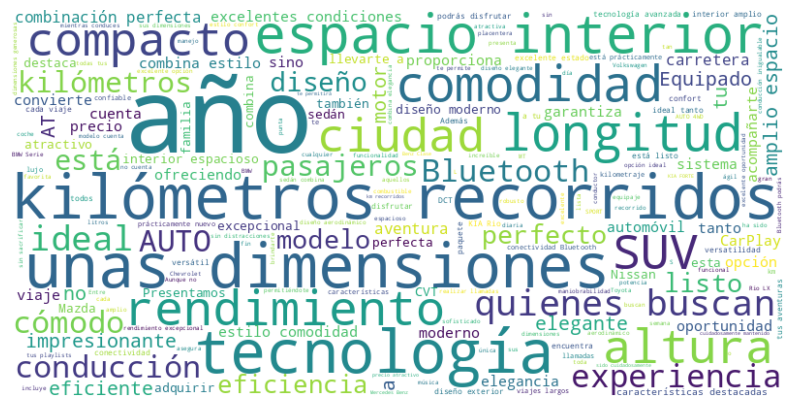

In [36]:
# Create a word cloud with the descriptions
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = ['el','de','del','mm','con','una','y','Descripción','solo','en','para','un','que','por','se','su','al','los','las','es','lo','más','como','este','la','vehículo','ofrece','ancho','largo','descubre','alto']

wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords=stop_words).generate(' '.join(df['description']))

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()